In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('Integrated Version.csv')
data

,Unnamed: 0,block,month,index,bathrooms,bedrooms,building_id,created,description,display_address,...,windowed kitchen,wine cooler.,Subway,• On-site lifestyle concierge by Luxury Attaché •24/7 Doorman • State of the art cardiovascular and weight training equipment • 24-hour valet parking garage • Valet services including dry cleaning,label,Brooklyn,Manhattan,Queens,The Bronx,Staten Island
0,0,Brooklyn,6,4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,...,0.0,0.0,0.0,0.0,1,1,0,0,0,0
1,1,Manhattan,6,6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
2,2,Manhattan,6,9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,...,0.0,0.0,0.0,0.0,1,0,1,0,0,0
3,3,Brooklyn,6,10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,...,0.0,0.0,0.0,0.0,1,1,0,0,0,0
4,4,Manhattan,6,15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49222,49222,Manhattan,4,123998,1.0,0,0,2016-04-02 01:29:32,This studio apartment is located in Hell's Kit...,West 49th Street,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
49223,49223,Manhattan,4,124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
49224,49224,Manhattan,4,124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,...,0.0,0.0,0.0,0.0,1,0,1,0,0,0
49225,49225,Brooklyn,4,124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,...,0.0,0.0,0.0,0.0,1,1,0,0,0,0


In [3]:
data['Brooklyn']=0
data['Manhattan']=0
data['Queens']=0
data['The Bronx']=0
data['Staten Island']=0

for i in range(0,len(data)):
    if data['block'][i] == 'Brooklyn':
        data['Brooklyn'][i]=1
    elif data['block'][i] == 'Manhattan':
        data['Manhattan'][i]=1
    elif data['block'][i] == 'Queens':
        data['Queens'][i]=1
    elif data['block'][i] == 'The Bronx':
        data['The Bronx'][i]=1
    elif data['block'][i] == 'Staten Island':
        data['Staten Island'][i]=1

C:\Users\gyl\.conda\envs\Week-1\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\gyl\.conda\envs\Week-1\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\gyl\.conda\envs\Week-1\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [4]:
data[['block','Brooklyn', 'Manhattan', 'Queens', 'The Bronx', 'Staten Island']].head(30)

,block,Brooklyn,Manhattan,Queens,The Bronx,Staten Island
0,Brooklyn,1,0,0,0,0
1,Manhattan,0,1,0,0,0
2,Manhattan,0,1,0,0,0
3,Brooklyn,1,0,0,0,0
4,Manhattan,0,1,0,0,0
5,Manhattan,0,1,0,0,0
6,Manhattan,0,1,0,0,0
7,Manhattan,0,1,0,0,0
8,Manhattan,0,1,0,0,0
9,Brooklyn,1,0,0,0,0


In [5]:
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
y = data[['label']]
y

,label
0,1
1,0
2,1
3,1
4,0
...,...
49222,0
49223,0
49224,1
49225,1


In [8]:
col = data.columns.values.tolist()
col.remove('label')
col.remove('block')
col.remove('index')
col.remove('building_id')
col.remove('created')
col.remove('description')
col.remove('display_address')
col.remove('manager_id')
col.remove('photos')
col.remove('street_address')
col.remove('interest_level')
col.remove('features')
col.remove('Unnamed: 0')
X = data[col].copy()
X

,month,bathrooms,bedrooms,latitude,listing_id,longitude,price,street_code,building_code,manager_code,...,well-maintained,windowed kitchen,wine cooler.,Subway,• On-site lifestyle concierge by Luxury Attaché •24/7 Doorman • State of the art cardiovascular and weight training equipment • 24-hour valet parking garage • Valet services including dry cleaning,Brooklyn,Manhattan,Queens,The Bronx,Staten Island
0,6,1.0,1,40.7108,7170325,-73.9539,2400,5,5,112,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,6,1.0,2,40.7513,7092344,-73.9722,3800,7,51,26,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
2,6,1.0,2,40.7575,7158677,-73.9625,3495,39,71,93,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
3,6,1.5,3,40.7145,7211212,-73.9425,3000,3,3,90,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
4,6,1.0,0,40.7439,7225292,-73.9743,2795,38,86,55,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49222,4,1.0,0,40.7640,6812513,-73.9917,2175,2,8286,222,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
49223,4,1.0,3,40.8433,6824800,-73.9396,2800,5,5,10,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
49224,4,1.0,2,40.8198,6813268,-73.9578,2395,174,126,14,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
49225,4,1.0,1,40.5765,6927093,-73.9554,1850,2,6,112,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [11]:
data['label'].value_counts()

0    34194
1    11203
2     3830
Name: label, dtype: int64

In [26]:
import matplotlib.pyplot as plt



<IPython.core.display.Javascript object>


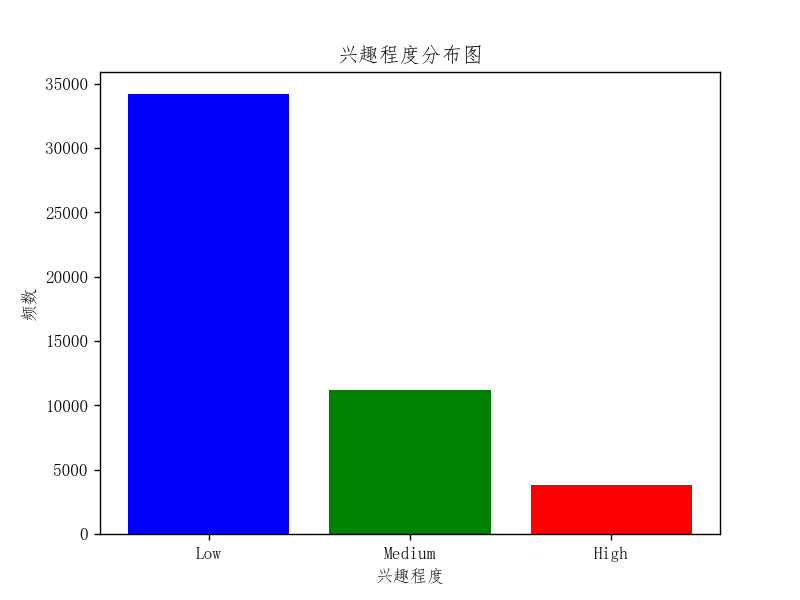

Text(0.5, 0, '兴趣程度')

In [27]:
number = [34194,11203,3830]
index = ['Low','Medium', 'High']
Wages = pd.Series(number, index=index)

plt.bar(index, number,color=['b','g','r'])
plt.title('兴趣程度分布图')
plt.ylabel('频数')
plt.xlabel('兴趣程度')


## Oversampling

In [10]:
# 使用RandomOverSampler从少数类的样本中进行随机采样来增加新的样本使各个分类均衡
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled_over, y_train_resampled_over = ros.fit_resample(X_train, y_train)
X_test_resampled_over, y_test_resampled_over = ros.fit_resample(X_test, y_test)
print(y_train_resampled_over['label'].value_counts())
print(y_test_resampled_over['label'].value_counts())

2    23936
1    23936
0    23936
Name: label, dtype: int64
2    10258
1    10258
0    10258
Name: label, dtype: int64


In [17]:
y_train_resampled_over.to_csv('y_train_resampled_over.csv')
X_train_resampled_over.to_csv('X_train_resampled_over.csv')
y_test_resampled_over.to_csv('y_test_resampled_over.csv')
X_test_resampled_over.to_csv('X_test_resampled_over.csv')

In [11]:
# SMOTE: 对于少数类样本a, 随机选择一个最近邻的样本b, 然后从a与b的连线上随机选取一个点c作为新的少数类样本
from imblearn.over_sampling import SMOTE#先要做归一化
X_train_resampled_smote, y_train_resampled_smote = SMOTE().fit_resample(X_train, y_train)
X_test_resampled_smote, y_test_resampled_smote = SMOTE().fit_resample(X_test, y_test)
print(y_train_resampled_smote['label'].value_counts())
print(y_test_resampled_smote['label'].value_counts())

2    23936
1    23936
0    23936
Name: label, dtype: int64
2    10258
1    10258
0    10258
Name: label, dtype: int64


In [12]:
# ADASYN: 关注的是在那些基于K最近邻分类器被错误分类的原始样本附近生成新的少数类样本
from imblearn.over_sampling import ADASYN
X_train_resampled_adasyn, y_train_resampled_adasyn = ADASYN().fit_resample(X_train, y_train)
X_test_resampled_adasyn, y_test_resampled_adasyn = ADASYN().fit_resample(X_test, y_test)
print(y_train_resampled_adasyn['label'].value_counts())
print(y_test_resampled_adasyn['label'].value_counts())

2    23986
0    23936
1    23481
Name: label, dtype: int64
2    10595
0    10258
1    10180
Name: label, dtype: int64


In [13]:
# RandomUnderSampler函数是一种快速并十分简单的方式来平衡各个类别的数据: 随机选取数据的子集.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_resampled_under, y_train_resampled_under = rus.fit_resample(X_train, y_train)
X_test_resampled_under, y_test_resampled_under = rus.fit_resample(X_test, y_test)
print(y_train_resampled_under['label'].value_counts())
print(y_test_resampled_under['label'].value_counts())

2    2715
1    2715
0    2715
Name: label, dtype: int64
1    1115
2    1115
0    1115
Name: label, dtype: int64


In [14]:
# 在之前的SMOTE方法中, 当由边界的样本与其他样本进行过采样差值时, 很容易生成一些噪音数据. 因此, 在过采样之后需要对样本进行清洗. 
# 这样TomekLink 与 EditedNearestNeighbours方法就能实现上述的要求.
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train_resampled_enn, y_train_resampled_enn = smote_enn.fit_resample(X_train, y_train)
X_test_resampled_enn, y_test_resampled_enn = smote_enn.fit_resample(X_test, y_test)
print(y_train_resampled_enn['label'].value_counts())
print(y_test_resampled_enn['label'].value_counts())

KeyboardInterrupt: 

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_train_resampled_tomek, y_train_resampled_tomek = smote_tomek.fit_resample(X_train, y_train)
X_test_resampled_tomek, y_test_resampled_tomek = smote_tomek.fit_resample(X_test, y_test)
print(y_train_resampled_tomek['label'].value_counts())
print(y_test_resampled_tomek['label'].value_counts())

## L1正则化

In [172]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [275]:
lasso = Lasso(alpha=0.01).fit(X_train, y_train)

In [276]:
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([0.07988707, 0.07814493, 0.43002066, ..., 0.52893072, 0.40188906,
       0.11080624])

In [277]:
coef = lasso.coef_
coef

array([ 0.        , -0.08912182,  0.01176882, ...,  0.        ,
        0.        ,  0.        ])

In [297]:
feat_labels = X_train.columns[0:]
feat_labels.to_numpy()
feat_labels = pd.DataFrame(feat_labels)
feat_labels.columns = ['Features']

feat_labels['Coefficient'] = coef
feat_labels.sort_values(by='Coefficient',inplace=True,ascending=False) 
feat_labels = feat_labels.reset_index()
feat_labels = feat_labels.drop('index',axis=1)
feat_labels

,Features,Coefficient
0,No Fee,0.127686
1,Laundry In Building,0.071701
2,Hardwood Floors,0.047724
3,bedrooms,0.011769
4,month,0.000000
...,...,...
1566,Dogs Allowed,-0.000232
1567,street_code,-0.000603
1568,bathrooms,-0.089122
1569,Doorman,-0.094011


## Random Forest

In [18]:
from  sklearn.ensemble import  RandomForestRegressor,GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [19]:
rd_model = RandomForestClassifier()
rd_model.fit(X_train, y_train)

C:\Users\gyl\.conda\envs\Week-1\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [20]:
importances = rd_model.feature_importances_

In [21]:
importances

array([3.40680092e-02, 1.66971588e-02, 4.40136499e-02, ...,
       2.85414354e-03, 2.25108859e-03, 9.88889877e-05])

In [22]:
feat_labels1 = X_train.columns[0:]
feat_labels1.to_numpy()
feat_labels1 = pd.DataFrame(feat_labels1)
feat_labels1.columns = ['Features']

feat_labels1['Coefficient'] = importances
feat_labels1.sort_values(by='Coefficient',inplace=True,ascending=False) 
feat_labels1 = feat_labels1.reset_index()
feat_labels1 = feat_labels1.drop('index',axis=1)
feat_labels1.head(1251)

,Features,Coefficient
0,price,1.205589e-01
1,listing_id,1.104951e-01
2,building_code,8.537557e-02
3,manager_code,8.534853e-02
4,latitude,8.444297e-02
...,...,...
1246,Indoor swimming pool,2.068601e-07
1247,Walk-in closet,2.001963e-07
1248,Children’s playroom,1.431803e-07
1249,Ached Doorways,1.424817e-07


In [25]:
feat_labels1.head(20)

,Features,Coefficient
0,price,0.120559
1,listing_id,0.110495
2,building_code,0.085376
3,manager_code,0.085349
4,latitude,0.084443
5,longitude,0.083344
6,street_code,0.062600
7,bedrooms,0.044014
8,month,0.034068
9,No Fee,0.019882


In [10]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
X = X.values
y = y.values

In [11]:
# normalization

X_train_norm = np.ones(X_train.shape)
X_test_norm = np.ones(X_test.shape)

num_features = X.shape[1]

for i in range(num_features):
    X_train_norm[:,i] = (X_train[:,i] - X[:,i].mean())/X[:,i].std()
    X_test_norm[:,i] = (X_test[:,i] - X[:,i].mean())/X[:,i].std()

C:\Users\gyl\.conda\envs\Week-1\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\gyl\.conda\envs\Week-1\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [12]:
y_train_norm = np.ones(y_train.shape)
y_test_norm = np.ones(y_test.shape)

num_features = y.shape[1]

for i in range(num_features):
    y_train_norm[:,i] = (y_train[:,i] - y[:,i].mean())/y[:,i].std()
    y_test_norm[:,i] = (y_test[:,i] - y[:,i].mean())/y[:,i].std()

In [19]:
for i in range(len(X_train_norm)): 
    sample= X_train_norm[i] 
    for j in range(len(sample)): 
        if np.isnan(sample[j]): 
            sample[j]=0

In [20]:
for i in range(len(X_test_norm)): 
    sample= X_test_norm[i] 
    for j in range(len(sample)): 
        if np.isnan(sample[j]): 
            sample[j]=0

In [21]:
for i in range(len(y_train_norm)): 
    sample= y_train_norm[i] 
    for j in range(len(sample)): 
        if np.isnan(sample[j]): 
            sample[j]=0

In [22]:
for i in range(len(y_test_norm)): 
    sample= y_test_norm[i] 
    for j in range(len(sample)): 
        if np.isnan(sample[j]): 
            sample[j]=0

## Normalization

In [24]:
gbm0= GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train_norm.astype('int'),y_train_norm.astype('int'))
y_pred_norm= gbm0.predict(X_test_norm)
y_predprob= gbm0.predict_proba(X_test_norm)[:,1]

C:\Users\gyl\.conda\envs\Week-1\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
print (y_predprob)
print (accuracy_score(y_pred_norm.round(), y_test_norm.round()))

[0.11342312 0.04009776 0.07205903 ... 0.02829121 0.06612568 0.28105237]
0.0


## None Normalization

In [37]:
gbm0= GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train,y_train)
y_pred= gbm0.predict(X_test)
y_predprob= gbm0.predict_proba(X_test)[:,1]

C:\Users\gyl\.conda\envs\Week-1\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print (y_predprob)
print (accuracy_score(y_pred, y_test))

[0.34931564 0.23138764 0.42558952 ... 0.04503753 0.27658646 0.11289793]
0.7306520414381474
